# Context: Predict Heart Failure

- Cardiovascular diseases (CVDs) are the leading cause of death globally 
- An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.

https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

# Inspiration

People with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help.

In [1]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)

In [3]:
dataset = pd.read_csv(NB_DIR/'data'/'heart.csv') 

In [4]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


This dataset contains 11 features that can be used to predict a possible heart disease.

In [5]:
dataset.Age.min(), dataset.Age.max()

(28, 77)

In [6]:
dataset.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [7]:
dataset['is_ExerciseAngina'] = False
dataset['is_FastingBS'] = False
dataset.loc[dataset.ExerciseAngina == 'Y', 'is_ExerciseAngina'] = True
dataset.loc[dataset.ExerciseAngina == 1, 'is_FastingBS'] = True
dataset.drop(['ExerciseAngina', 'FastingBS'], axis=1, inplace=True)

In [8]:
dataset.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.15, shuffle=True, random_state=37)

In [10]:
train.shape, test.shape

((780, 12), (138, 12))

In [11]:
test.HeartDisease.value_counts()

0    72
1    66
Name: HeartDisease, dtype: int64

# Setting up the environment in PyCaret

In [12]:
from pycaret.classification import *

In [13]:
dataset.shape

(918, 12)

In [14]:
# initialize setup
data = setup(data=train, test_data=test, target ='HeartDisease', train_size=0.99, fold_shuffle=True, fold = 10, normalize=True)

,Description,Value
0,session_id,5290
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(780, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


# Select models

In [15]:
best_models = compare_models(n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8744,0.9299,0.9117,0.8731,0.8914,0.7424,0.7448,1.4980
knn,K Neighbors Classifier,0.8705,0.9055,0.9161,0.8643,0.8890,0.7337,0.7371,0.0910
rf,Random Forest Classifier,0.8667,0.9242,0.9003,0.8711,0.8845,0.7267,0.7298,0.0420
lr,Logistic Regression,0.8615,0.9214,0.8913,0.8695,0.8793,0.7168,0.7194,0.1850
gbc,Gradient Boosting Classifier,0.8615,0.9250,0.8913,0.8703,0.8794,0.7165,0.7198,0.0180
ridge,Ridge Classifier,0.8577,0.0000,0.8914,0.8637,0.8765,0.7086,0.7109,0.0060
lda,Linear Discriminant Analysis,0.8564,0.9216,0.8891,0.8634,0.8752,0.7061,0.7084,0.0030
lightgbm,Light Gradient Boosting Machine,0.8564,0.9245,0.8890,0.8629,0.8750,0.7061,0.7083,0.5190
et,Extra Trees Classifier,0.8551,0.9159,0.8775,0.8712,0.8730,0.7041,0.7074,0.0370
nb,Naive Bayes,0.8449,0.9134,0.8620,0.8652,0.8628,0.6843,0.6859,0.0080


In [16]:
best_models

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=5290, verbose=0,
                        warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=5290, so

# Hyperparameter tuning

In [17]:
#tuned_best_model = tune_model(best_models[0])

In [18]:
blender_specific = blend_models(estimator_list = best_models[:2], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8846,0.9495,1.0000,0.8333,0.9091,0.7547,0.7785
1,0.8846,0.8936,0.9333,0.8750,0.9032,0.7607,0.7632
2,0.8718,0.9231,0.8636,0.9048,0.8837,0.7410,0.7420
3,0.8462,0.8977,0.8636,0.8636,0.8636,0.6872,0.6872
4,0.8718,0.9318,0.9318,0.8542,0.8913,0.7358,0.7399
5,0.8462,0.9325,0.8864,0.8478,0.8667,0.6851,0.6860
6,0.8077,0.8757,0.8636,0.8085,0.8352,0.6050,0.6069
7,0.9103,0.9626,0.9091,0.9302,0.9195,0.8181,0.8184
8,0.8718,0.9178,0.9091,0.8696,0.8889,0.7376,0.7386
9,0.9231,0.9779,0.9545,0.9130,0.9333,0.8425,0.8437


tuned_best_model# Combining models

# Analyze results

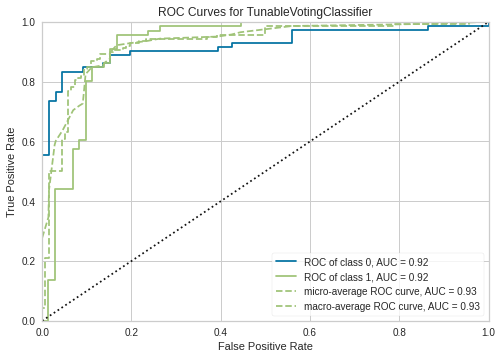

In [19]:
data = plot_model(blender_specific) #Get an understanding of the data 

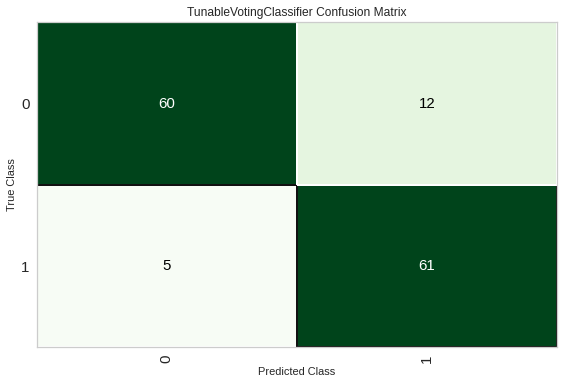

In [20]:
plot_model(blender_specific, plot = 'confusion_matrix') #look at the outliers

In [21]:
prediction_holdout = predict_model(blender_specific)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8768,0.9226,0.9242,0.8356,0.8777,0.7542,0.7581


## Train final model

In [22]:
final_model = finalize_model(blender_specific)

# Export model

In [23]:
save_model(final_model,'final_model_heart_failure')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='HeartDisease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  TunableVotingClassifier(estimators=[('catboost',
                                                       <catboost.core.CatBoostClassifier object at 0x7f052986a700>),
                                                   